In [ ]:
import torch
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
data_dict = {}
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
data_dict['X_train'] = np.array(x_train[:40000,:], dtype=float).reshape(40000, 784)
data_dict['y_train'] = np.array(y_train[:40000], dtype=float)
data_dict['X_val'] = np.array(x_train[40000:50000,:], dtype=float).reshape(10000, 784)
data_dict['y_val'] = np.array(y_train[40000:50000], dtype=float)
data_dict['X_test'] = np.array(x_test, dtype=float).reshape(10000, 784)
data_dict['y_test'] = np.array(y_test, dtype=float)
print('Train data shape: ', len(data_dict['X_train']), len(data_dict['X_train'][0]))
print('Train labels shape: ', len(data_dict['y_train']), len(data_dict['X_train'][0]))
print('Validation data shape: ', len(data_dict['X_val']), len(data_dict['X_train'][0]))
print('Validation labels shape: ', len(data_dict['y_val']), len(data_dict['X_train'][0]))
print('Test data shape: ', len(data_dict['X_test']), len(data_dict['X_train'][0]))
print('Test labels shape: ', len(data_dict['y_test']), len(data_dict['X_train'][0]))

11490434/11490434 [==============================] - 0s 0us/step
Train data shape:  40000 784
Train labels shape:  40000 784
Validation data shape:  10000 784
Validation labels shape:  10000 784
Test data shape:  10000 784
Test labels shape:  10000 784


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp



In [ ]:
X = data_dict['X_train']
y = data_dict['y_train']
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, data_dict['X_train'])) #add the intercept
(m,n) = X.shape
import numpy as np
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using for-loop " + str(1000*(toc-tic)) + " ms")
c = 0
tic = time.time()
c = np.dot(a,b) # no for-loops in vectorized version
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using vectorized operation " + str(1000*(toc-tic)) + " ms")

value of c 250158.84008
time taken using for-loop 1340.4765129089355 ms
value of c 250158.84008
time taken using vectorized operation 6.370067596435547 ms


In [ ]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).astype(int).flatten(), lmbda), maxiter = 50)

<ipython-input-2-306beb3c313b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: divide by zero encountered in log
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: invalid value encountered in multiply
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 5
         Gradient evaluations: 5


<ipython-input-2-306beb3c313b>:7: RuntimeWarning: divide by zero encountered in log
  temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
<ipython-input-2-306beb3c313b>:7: RuntimeWarning: invalid value encountered in multiply
  temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))


         Current function value: 0.017835
         Iterations: 500
         Function evaluations: 929
         Gradient evaluations: 929
         Current function value: 0.064822
         Iterations: 500
         Function evaluations: 943
         Gradient evaluations: 943
         Current function value: 0.080474
         Iterations: 500
         Function evaluations: 929
         Gradient evaluations: 929
         Current function value: 0.043276
         Iterations: 500
         Function evaluations: 940
         Gradient evaluations: 940
         Current function value: 0.071858
         Iterations: 500
         Function evaluations: 940
         Gradient evaluations: 940
         Current function value: 0.035550
         Iterations: 500
         Function evaluations: 937
         Gradient evaluations: 937
         Current function value: 0.038679
         Iterations: 500
         Function evaluations: 929
         Gradient evaluations: 929


<ipython-input-2-306beb3c313b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: divide by zero encountered in log
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: invalid value encountered in multiply
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 20
         Gradient evaluations: 13


<ipython-input-2-306beb3c313b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: divide by zero encountered in log
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
<ipython-input-2-306beb3c313b>:6: RuntimeWarning: invalid value encountered in multiply
  temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))


         Current function value: 0.101952
         Iterations: 500
         Function evaluations: 924
         Gradient evaluations: 924


In [ ]:
from os import wait
w = theta[:,:-1]
print(len(w),len(w[0]))

10 784


In [ ]:
pred = np.argmax(data_dict['X_val'] @ w.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == data_dict['y_val'].astype(int).flatten()) * 100

71.24000000000001

In [ ]:
print(w.reshape(-1))

[-7.68966729e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [ ]:
import struct
for i in range(len(w.reshape(-1))):
  print("@"+hex(i)[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', w.reshape(-1)[i].item()))[0])[2:].zfill(8), end="|")
print()

(7840,)
@0000 b8a14396|@0001 00000000|@0002 00000000|@0003 00000000|@0004 00000000|@0005 00000000|@0006 00000000|@0007 00000000|@0008 00000000|@0009 00000000|@000a 00000000|@000b 00000000|@000c 00000000|@000d b4820b16|@000e b5728a84|@000f b4deee6e|@0010 b2949ef4|@0011 00000000|@0012 00000000|@0013 00000000|@0014 00000000|@0015 00000000|@0016 00000000|@0017 00000000|@0018 00000000|@0019 00000000|@001a 00000000|@001b 00000000|@001c 00000000|@001d 00000000|@001e 00000000|@001f 00000000|@0020 00000000|@0021 00000000|@0022 b2841b84|@0023 b58fb7ef|@0024 b6328d30|@0025 b6804d39|@0026 b6a6bf3b|@0027 b6e869e8|@0028 b72309b5|@0029 b742be0f|@002a b755eece|@002b b7780e6a|@002c b7616a33|@002d b74e83c3|@002e b7139eff|@002f b6d15219|@0030 b6a4bf50|@0031 b65aee99|@0032 b5a209c0|@0033 b51ce0ac|@0034 b4cb5259|@0035 00000000|@0036 00000000|@0037 00000000|@0038 00000000|@0039 00000000|@003a 00000000|@003b b4041b84|@003c b36f71df|@003d b4ee69a8|@003e b4651fb8|@003f b6514195|@0040 b737f00f|@0041 b7bcd2f4|@0

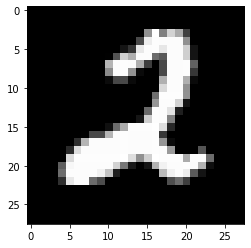

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

index = 155

plt.imshow(data_dict['X_val'][index].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print(data_dict['X_val'][index])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 145. 255. 128. 212. 170.  63.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  73. 237. 253. 252. 252. 252. 144.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  21.  53.
 232. 252. 253. 231. 252. 252. 207.  20.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  84. 207. 175.
 252. 252. 108.  88. 252. 252. 207.  20.   0.   0.   0.   0.   0.   0.
   0. 

In [ ]:
for i in range(len(data_dict['X_val'][index])):
  print("@"+hex(i)[2:].zfill(4)+" "+hex(int(data_dict['X_val'][index][i]))[2:].zfill(8), end="|")
print()

@0000 00000000|@0001 00000000|@0002 00000000|@0003 00000000|@0004 00000000|@0005 00000000|@0006 00000000|@0007 00000000|@0008 00000000|@0009 00000000|@000a 00000000|@000b 00000000|@000c 00000000|@000d 00000000|@000e 00000000|@000f 00000000|@0010 00000000|@0011 00000000|@0012 00000000|@0013 00000000|@0014 00000000|@0015 00000000|@0016 00000000|@0017 00000000|@0018 00000000|@0019 00000000|@001a 00000000|@001b 00000000|@001c 00000000|@001d 00000000|@001e 00000000|@001f 00000000|@0020 00000000|@0021 00000000|@0022 00000000|@0023 00000000|@0024 00000000|@0025 00000000|@0026 00000000|@0027 00000000|@0028 00000000|@0029 00000000|@002a 00000000|@002b 00000000|@002c 00000000|@002d 00000000|@002e 00000000|@002f 00000000|@0030 00000000|@0031 00000000|@0032 00000000|@0033 00000000|@0034 00000000|@0035 00000000|@0036 00000000|@0037 00000000|@0038 00000000|@0039 00000000|@003a 00000000|@003b 00000000|@003c 00000000|@003d 00000000|@003e 00000000|@003f 00000000|@0040 00000000|@0041 00000000|@0042 0000

In [ ]:
print(data_dict['y_val'][index])

2.0


In [ ]:
print(w.shape)
print(data_dict['X_val'][index].reshape(784,1).shape)

(10, 784)
(784, 1)


In [ ]:
pred = w @ data_dict['X_val'][index]
pred

array([-226.92273063,  -21.16337368,    9.13831293,   -4.53802299,
        -24.23932025,  -15.52006622,  -20.64715617,  -49.31131737,
          0.        ,  -35.03917862])

In [ ]:
pred = np.argmax(w @ data_dict['X_val'][index])
pred

2

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the dataset into training and testing sets
train_size = 60000
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = softmax_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9209


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# Get the weight matrix of the model
weight_matrix = softmax_reg.coef_
print("Weight matrix shape:", weight_matrix.shape)

Weight matrix shape: (10, 784)
